# EXOPLANETS AND ECLIPSING BINARIES
## Dr Simon P Young

### Abstract

A number of confirmed exoplanetary systems exist within the realm of binary star systems. Why chose eclipsing binaries (EB) as targets for exoplanetary research? The prevalence of binary systems that host at least one FGKM star is high. Exoplanets have been confirmed in binary systems - both cirbumbinary planets (CBP; Kepler-16b, Kepler-34b, Kepler-35b and the Kepler-47 system of three planets) and planets orbiting an individual star (Proxima Centauri b - really a planet orbiting in a trinary system). Exoplanet orbits are more likely to be found in the ecliptic - the eclipsing binaries are a subpopulation of stars where alignment of planetary transit may be more favourable to Earthly astronomers. The combination of transit observation with astrometry - in particular relative astrometry with its potential for nano-arcsecond precision - can create rich exobody parameter data and system architecture information; timing variations in transit provide further breaks in the degeneracy of parameter space of the dynamics of the system. Interesting habitable zone (HZ) options arise in binary systems, making exploration of this parameter space in models interesting and inciteful. 

A catalogue of ecclipsing binaries from GAIA DR3 (Mowlavi+ 2023) will be interogated. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.simbad import Simbad
import astropy.units as u
import astropy.constants as c


In [2]:
"""
Effective temperature at surface of an exoplanet.
First for a single star (Earth and Sol)...
"""

tStar = 5778 * u.K  # effective temp of star
rStar = 1 * c.R_sun  # radius of star in units of sun radii
a = 1 * c.au  # radius of planet's orbit around star
aB = 0.294 # Bond albedo (0.294 for Earth)

tEff = tStar * np.sqrt(rStar / (2 * a)) * (1 - aB)**(1/4)

print(f'The effective temperature of the planet is {tEff:.0f}') 

The effective temperature of the planet is 255 K


In [45]:
%%latex
For a single star and a circular radius, the effective temperature (Teff) of the planet is given by:
\begin{equation}
T_{eff} = T_{star} \sqrt{\frac{R_{star}}{2a}} (1 - A)^{1/4}
\end{equation}

<IPython.core.display.Latex object>

In [3]:
"""
Next stage is crudely to add two stars together
"""

tStar1 = 5778 * u.K  # temp of GV5-star (Sol)
rStar1 = 1 * c.R_sun  # radius of star in units of sun radii
a1 = 1 * c.au  # semimajor axis of planet's orbit around star

tStar2 = 3900 * u.K  # temp of a run-of-the-mill M-dwarf
rStar2 = 0.21 * c.R_sun  # radius of star in units of sun radii; in this case for an M-dwarf
a2 = 1 * c.au  # semimajor axis of planet's orbit around star

aB = 0.294 # Bond albedo (for Earth)

tEff = ((tStar1 * np.sqrt(rStar1 / (2 * a1)))+(tStar2 * np.sqrt(rStar2 / (2 * a2)))) * (1 - aB)**(1/4)

print(f'The effective temperature of the planet is {tEff:.0f}') 

The effective temperature of the planet is 334 K


In [53]:
%%latex

For a binary star system with a lot of very basic assumptions, the effective temperature (Teff) of the planet is given by:
\begin{equation}
T_{eff} = \left(T_{star1} \sqrt{\frac{R_{star1}}{2a_1}} + T_{star2} \sqrt{\frac{R_{star2}}{2a_2}}\right) (1 - A)^{1/4}
\end{equation}

But the semi-major axes will be functions of the orbital parameters of the binary system, and the effective temperature will be a function of the distance from the stars.


<IPython.core.display.Latex object>

In [50]:
"""
First ignore transits of stars or planets. Assume a slightly off-ecliptic orbit of the CPB that 
means a constant illumination from both stars throughout the full orbital phase of the planet.
The distance of the planet varies from the stars - 
so a1 and a2 become functions that change over the course of the circumbinary orbit.
tEff thus becomes a function of orbital position of planet in orbit
Assume circular orbits (around barycentres) of all bodies in the first approximation. 
tStar_n and rStar_n are constants. 
Use basic physics - distance from star falls off as 1/r^2
"""



'\nFirst ignore transits of stars or planets. Assume a slightly off-ecliptic orbit of the CPB that \nmeans a constant illumination from both stars throughout the full orbital phase of the planet.\nThe distance of the planet varies from the stars - \nso a1 and a2 become functions that change over the course of the circumbinary orbit.\ntEff thus becomes a function of orbital position of planet in orbit\nAssume circular orbits (around barycentres) of all bodies in the first approximation. \ntStar_n and rStar_n are constants. \nUse basic physics - distance from star falls off as 1/r^2\n'

In [8]:
"""
Next factor in primary and secondary eclipses of stars with each other.
"""

'Next factor in primary and secondary eclipses of stars with each other.'

In [ ]:
"""
Next I'd get some real parameters for a Kepler system with a CPB...
"""

In [15]:
# from https://asas-sn.osu.edu/binaries
import pandas as pd
ebAsassn = pd.read_csv('/Users/spydoc/Dropbox/JupyterNotebooks/msc_space_ou/msc_sandbox/ebAsassn.csv')
ebAsassn

,asassn_name,raj2000,dej2000,requivsumfrac,teffratio,period,ecc,per0,incl,t0supconj,...,bp_rp_corrected,absolute_g,gaia_filter,heasarc_reference_id,xray_observatory,xray_exposure,xray_separation,xray_luminosity,state,xray_flag
0,ASASSN-V J214524.49+290420.0,326.35203,29.07221,0.401290,0.976848,1.601048,0.016873,68.244533,77.759521,8020.394154,...,0.650242,2.275251,True,NaN,NaN,NaN,NaN,NaN,ms,False
1,ASASSN-V J052719.41+414926.0,81.83086,41.82389,0.381953,0.824985,1.332469,0.000050,340.387868,78.057794,8018.818779,...,0.761086,2.105173,False,NaN,NaN,NaN,NaN,NaN,NaN,False
2,ASASSN-V J201501.48+094747.2,303.75617,9.79645,0.311086,0.981901,2.365801,0.008676,280.670558,86.308349,8019.952837,...,0.810990,2.784796,True,NaN,NaN,NaN,NaN,NaN,sg,False
3,ASASSN-V J201648.36+101645.0,304.20148,10.27918,0.266933,0.919306,2.623751,0.065730,87.337373,80.505095,8019.340428,...,0.398522,2.138767,True,NaN,NaN,NaN,NaN,NaN,ms,False
4,ASASSN-V J201957.55+104444.8,304.98980,10.74577,0.403868,0.509548,6.805956,0.002338,301.147845,77.564340,8021.659720,...,0.734730,1.290353,False,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35459,ASASSN-V J234700.42+365831.4,356.75177,36.97538,0.182218,0.970418,5.080634,0.050667,89.605968,86.801355,8033.986849,...,0.749629,3.018458,True,NaN,NaN,NaN,NaN,NaN,ms,False
35460,ASASSN-V J234913.86+654905.1,357.30777,65.81809,0.346634,0.918355,1.456866,0.057864,86.248825,83.031911,8251.816289,...,1.256222,5.036846,True,NaN,NaN,NaN,NaN,NaN,ms,False
35461,ASASSN-V J235041.22+561058.5,357.67175,56.18291,0.498210,0.992352,1.528562,0.001456,295.068196,79.813859,8256.495311,...,0.795476,2.217707,True,NaN,NaN,NaN,NaN,NaN,sg,False
35462,ASASSN-V J235431.09-632821.7,358.62954,-63.47270,0.259377,0.991029,0.724860,0.000289,106.866278,86.049933,8002.496958,...,1.717673,7.656017,True,NaN,NaN,NaN,NaN,NaN,ms,False


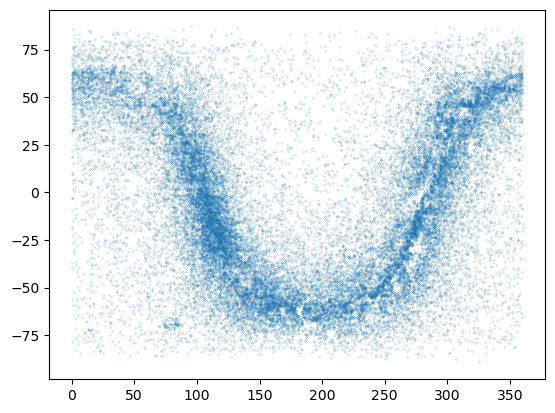

In [24]:
plt.plot(ebAsassn['raj2000'], ebAsassn['dej2000'], marker='.', ms=0.3, linestyle='None')

In [ ]:
"""
See https://irsa.ipac.caltech.edu/applications/Gator/index.html 
for other data sets"""

In [64]:
# Download eclipsing binary data from Gaia; 
# from https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_variability_tables/ssec_dm_vari_eclipsing_binary.html
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia   # astroquery can be mamba or pip-installed

Gaia.login(credentials_file='/Users/spydoc/Dropbox/my_credentials_file.txt')
Gaia.ROW_LIMIT = -1  # this switches off Gaia's default limit of 2000 rows to a table
# must choose asynchroneous query to get more than 2000 rows

query_text = '''SELECT TOP 5000 source_id, global_ranking, ra, dec, parallax
FROM gaiadr3.gaia_source 
JOIN gaiadr3.vari_eclipsing_binary AS ap USING (source_id)
WHERE global_ranking > 0.5
ORDER by source_id
'''

job = Gaia.launch_job_async(query_text)
gaia_data = job.get_results()
Gaia.logout()
gaia_df = gaia_data.to_pandas()
gaia_df

INFO: Login to gaia TAP server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Gaia TAP server logout OK [astroquery.gaia.core]
INFO: Gaia data server logout OK [astroquery.gaia.core]


,source_id,global_ranking,ra,dec,parallax
0,46626164993792,0.525435,45.627150,0.578258,-0.382365
1,138577120584320,0.731658,45.008249,1.061330,0.340300
2,203551385701760,0.562467,46.034027,1.260533,4.191852
3,278760557996032,0.532893,45.629431,1.665842,0.047721
4,544743587681792,0.565526,45.112690,2.183196,3.228909
...,...,...,...,...,...
4995,157470062466949504,0.572972,75.157799,31.693760,0.581331
4996,157472879965557888,0.574428,74.998604,31.723708,0.334375
4997,157473777615803136,0.500125,74.956252,31.753695,-5.184992
4998,157474907190261760,0.546597,75.101880,31.811177,0.380102


In [ ]:
'''
IDEAS

Using teffratio to determine the temperature of the circumbinary planet? Is this a thing? 
teffratio available in ASASSN data... ?available in Gaia data?
Could simulate a circumbinary planet with a known teffratio and see if it works.
Could simplify determing the min/max/average temperature of the circumbinary planet.
The simplest Teff formula just uses radius (assuming circular orbit) from star. 

Think about the geometry of the system. Binaries are a certain distnance apart. Planet orbits around the barycentre.
Start with eccentricity = 0 and then move on to eccentricity > 0. i.e. start with circular orbits and then move on to elliptical orbits.
Use the formula for the distance of the planet from the stars, and then use the formula for the effective temperature of the planet.
Only worry about the primary and secondary eclipses of the stars with each other later on.
Only worry about Kepler's formula for the period of the planet later on.

A catalogue is important as Vera Rubin will detect these frequently. 

Write a Teff function for a CBP. Depends on phase of planet and binaries. And stellar class and binary separation and planet separation

HZ for a CBP

Develop a circumbinarity index

Circimbinary planets CBP - recent paper and check out all discoveries

Coplanarity suggests good targets for transit surveys

Gaia recent paper on eclipsing binaries

RV signal may be interesting. Mixture of the two stars. Model. With or without CBP

Pay attention to spectral classes - is there a census of these yet for binaries in general 

RELATIVE astrometry GALORE! See Toliman

Microlensing or as I’ll rename it NANOLENSING - explore possibilities 

Transit curve possibilities for these - include full phase of orbits. Albedo. 

TTVs and TDVs for the planet transit (not moon)

Complex orbital dynamics may ensue, e.g. greater eccentiricty and complex orbital resonances - hence astrometery very useful. 

A complex radiation environment for a planet may ensue, but also a complex magnetoshere environment for a planet may exist proving protection.

Use the yin yang symbol

The following is a quickstart google colab notebook for 
PHOEBE2 - https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.4/quickstart.ipynb
'''

### REFERECENCES AND BIBLIOGRAPHY

1. The first Gaia catalogue of eclipsing-binary candidates. https://www.aanda.org/articles/aa/full_html/2023/06/aa45330-22/aa45330-22.html
https://www.aanda.org/articles/aa/pdf/2023/06/aa45330-22.pdf

2. ASAS-SN Variable Stars Database. https://asas-sn.osu.edu/variables . https://asas-sn.osu.edu/binaries 





### ABBREVIATIONS

CBP  Circumbinary Planet,
EB   Eclipsing Binary,
HZ   Habitable Zone


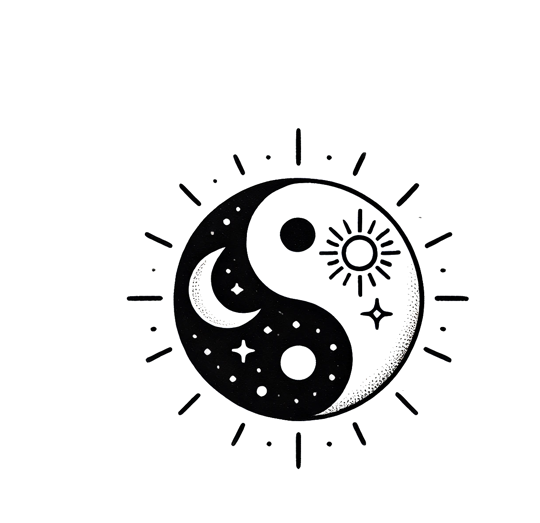

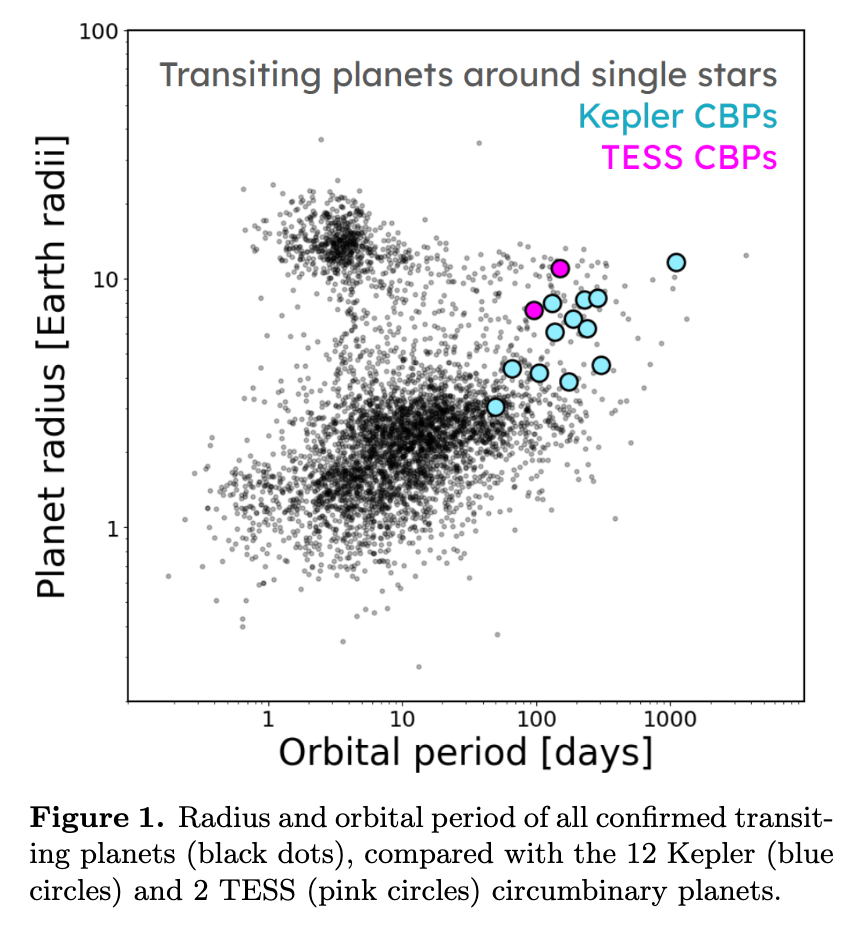

FROM PERPLEXITY - OpenSource options for detecting and characterising eclipsing binaries

There are several **open-source software options** available for identifying and analyzing eclipsing binaries. These tools are widely used by professional and amateur astronomers for processing and modeling light curves, as well as performing photometric analyses. Here are some notable options:

1. **PHOEBE (PHysics Of Eclipsing BinariEs):**
   - PHOEBE is a powerful open-source tool designed specifically for modeling eclipsing binary systems. It allows users to simulate light curves, radial velocity curves, and other observables.
   - Website: [phoebe-project.org](https://phoebe-project.org)

2. **Lightkurve:**
   - Lightkurve is a Python package that simplifies the analysis of time-series data from missions like Kepler and TESS. It is especially useful for identifying periodic signals in light curves, such as those caused by eclipsing binaries.
   - Repository: [github.com/lightkurve/lightkurve](https://github.com/lightkurve/lightkurve)

3. **Period04:**
   - Although Period04 is primarily used for frequency analysis of time-series data, it is open-source and can help identify periodic signals in light curves related to eclipsing binaries.
   - Repository: [http://period04.net/].
   - Can't get this to load

4. **VARTOOLS:**
   - VARTOOLS is an open-source command-line utility for analyzing time-series data. It includes period-search algorithms like Lomb-Scargle and Box-Least Squares (BLS), which are effective for detecting eclipsing binaries.
   - Repository: [https://github.com/joeldhartman/vartools](https://github.com/dfm/vartools) | https://www.astro.princeton.edu/~jhartman/vartools.html 

5. **PyKE (Kepler Tools):**
   - PyKE is a Python-based toolkit for working with Kepler/K2 data, including tools to identify and analyze eclipsing binaries through their light curves.
   - Repository: [github.com/KeplerGO/PyKE](https://github.com/KeplerGO/PyKE)

6. **Eleanor:**
   - Eleanor is an open-source Python package designed to process TESS data, making it ideal for identifying eclipsing binaries in TESS light curves.
   - Repository: [github.com/afeinstein20/eleanor](https://github.com/afeinstein20/eleanor)

7. **AstroImageJ:**
   AstroImageJ is an astronomical image processing software that includes tools for photometry and time-series analysis, making it suitable for studying eclipsing binaries. http://www.astro.louisville.edu/software/astroimagej/ 